# Image classification problem

We are trying to 

*   We are trying to build a binary image 
classification model using convolutional neural networks.  
*   Our data has 2 classes- Lions and Tigers. For fetching training and validation data, we have fetched Lions/Tigers from the Savannah for training and Lions/Tigers from Zoos for testing, so that we have more varied and hopefully non overlapping data to work with.
*   Overall, we have 200 images for testing and 100 images for validation per category. So 300 images total for either category.
*   We do not have much data to begin with, and hence use data augmentation methods to try and get better results and prevent overfitting since deep learning models require lots of data to train. 
*   We first load our images, the preprocess them to convert them into pixel grids and ultimately to floating point tensors. We then rescale and augment the data.
*   Following preprocessing we pass the images through our model which consists of multiple convolutional, pooling, dropout and dense layers.
*   The idea is to convolve the images into smaller coarsely aggregated feature maps full of information using kernels/filters

Our main goal is to see if using deep learning Convolutional Neural Network we can properly classify the images of Lions and Tigers.

# Downloading Images

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir images
!mkdir images/train
!mkdir images/all
!mkdir images/validation
!mkdir images/test

# LION 
## Training

In [ ]:
from bing_image_downloader import downloader
#Class 1 : Lions. 
#we use lions in savanna for training. I specify animal to make sure I am getting the right data.
downloader.download("lion animal in savanna", limit=205,  output_dir='images/all', adult_filter_off=True, force_replace=False)

In [ ]:
import os
import numpy as np
path='/content/images/all/lion animal in savanna' #path where training images stored
dirFiles = os.listdir(path) #list of directory files

In [ ]:
import natsort
print(natsort.natsorted(dirFiles,reverse=False))
#see all files in sorted order

['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg', 'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg', 'Image_9.jpg', 'Image_10.jpg', 'Image_11.jpg', 'Image_12.jpg', 'Image_13.jpg', 'Image_14.jpg', 'Image_15.jpg', 'Image_16.jpg', 'Image_17.jpg', 'Image_18.jpg', 'Image_19.jpg', 'Image_20.jpg', 'Image_21.jpg', 'Image_22.jpg', 'Image_23.jpg', 'Image_24.jpg', 'Image_25.jpg', 'Image_26.jpg', 'Image_27.jpg', 'Image_28.jpg', 'Image_29.jpg', 'Image_30.jpg', 'Image_31.jpg', 'Image_32.jpg', 'Image_33.jpg', 'Image_34.jpg', 'Image_35.jpg', 'Image_36.jpg', 'Image_37.jpg', 'Image_38.jpg', 'Image_39.jpg', 'Image_40.jpg', 'Image_41.jpg', 'Image_42.jpg', 'Image_43.jpg', 'Image_44.jpg', 'Image_45.jpg', 'Image_46.jpg', 'Image_47.jpg', 'Image_48.jpg', 'Image_49.jpg', 'Image_50.jpg', 'Image_51.jpg', 'Image_52.jpg', 'Image_53.jpeg', 'Image_54.jpg', 'Image_55.jpg', 'Image_56.jpg', 'Image_57.JPG', 'Image_58.jpg', 'Image_59.jpg', 'Image_60.jpg', 'Image_61.jpg', 'Image_62.jpg', 'Image_63.jpg',

In [ ]:
myimages = [] #list of image filenames
for files in dirFiles: #to filter out all non jpg images
  if '.jpg' not in files:
    myimages.append(files)
print(len(myimages)) #no.of files without jpg extension
print(myimages) #to view list of filenames that dont have a jpg extension

7
['Image_57.JPG', 'Image_74.gif', 'Image_53.jpeg', 'Image_150.jpeg', 'Image_203.gif', 'Image_75.jpeg', 'Image_98.JPG']


In [ ]:
filtered_files = [file for file in dirFiles if file.endswith(".gif")] #list of all files with .gif extension
#we can see that one file has the .gif extension. we remove this image.
for file in filtered_files:
  path_to_file = os.path.join(path, file)
  print(path_to_file) #the path to the .gif file
  os.remove(path_to_file) #the file is removed using os package remove function

/content/images/all/lion animal in savanna/Image_74.gif
/content/images/all/lion animal in savanna/Image_203.gif


In [ ]:
dirFiles = os.listdir(path) #list of directory files
delete= np.random.choice(dirFiles,abs(200-len(dirFiles))) #we choose only 200 images for our sample
for file_ in delete:
    os.remove(os.path.join(path, file_)) #remove extra images
    print(os.path.join(path, file_))

/content/images/all/lion animal in savanna/Image_72.jpg
/content/images/all/lion animal in savanna/Image_195.jpg
/content/images/all/lion animal in savanna/Image_142.jpg


In [ ]:
#now that some files are removed, we have to re-number the files so that the images are in order, and are easily transferrable to train and validation partitions
for count, filename in enumerate(os.listdir(path)): #count refers to index and filename refers to name of image
    dst = f"Img_{str(count)}.jpg" #we rename image in the format : img_0 , img_1 etc.
    dst =f"{path}/{dst}" 
    src =f"{path}/{filename}"  # foldername/filename, refers to image path
    os.rename(src, dst) #rename original image name with new ordered image name

In [ ]:
dirFiles = os.listdir('/content/images/all/lion animal in savanna') #list of directory files
print(natsort.natsorted(dirFiles,reverse=False))
#verify new image names. we can see files with names from 0 to 199.

['Img_0.jpg', 'Img_1.jpg', 'Img_2.jpg', 'Img_3.jpg', 'Img_4.jpg', 'Img_5.jpg', 'Img_6.jpg', 'Img_7.jpg', 'Img_8.jpg', 'Img_9.jpg', 'Img_10.jpg', 'Img_11.jpg', 'Img_12.jpg', 'Img_13.jpg', 'Img_14.jpg', 'Img_15.jpg', 'Img_16.jpg', 'Img_17.jpg', 'Img_18.jpg', 'Img_19.jpg', 'Img_20.jpg', 'Img_21.jpg', 'Img_22.jpg', 'Img_23.jpg', 'Img_24.jpg', 'Img_25.jpg', 'Img_26.jpg', 'Img_27.jpg', 'Img_28.jpg', 'Img_29.jpg', 'Img_30.jpg', 'Img_31.jpg', 'Img_32.jpg', 'Img_33.jpg', 'Img_34.jpg', 'Img_35.jpg', 'Img_36.jpg', 'Img_37.jpg', 'Img_38.jpg', 'Img_39.jpg', 'Img_40.jpg', 'Img_41.jpg', 'Img_42.jpg', 'Img_43.jpg', 'Img_44.jpg', 'Img_45.jpg', 'Img_46.jpg', 'Img_47.jpg', 'Img_48.jpg', 'Img_49.jpg', 'Img_50.jpg', 'Img_51.jpg', 'Img_52.jpg', 'Img_53.jpg', 'Img_54.jpg', 'Img_55.jpg', 'Img_56.jpg', 'Img_57.jpg', 'Img_58.jpg', 'Img_59.jpg', 'Img_60.jpg', 'Img_61.jpg', 'Img_62.jpg', 'Img_63.jpg', 'Img_64.jpg', 'Img_65.jpg', 'Img_66.jpg', 'Img_67.jpg', 'Img_68.jpg', 'Img_69.jpg', 'Img_70.jpg', 'Img_71.jpg', '

In [ ]:
!mkdir images/train/lion #directory to store train images for lion

In [ ]:
count=[] #to count how many images saved
for files in dirFiles: #to iterate over all images
  count.append(files)
ct_train_lion=len(count) #count of total number of images in train set for lion category
ct_train_lion

200

In [ ]:
ct_train_lion=len(count) #count of total number of images
import shutil #to copy file from source to destination
fnames = ['lion.{}.jpg'.format(i) for i in range(0,ct_train_lion)]
fnames2 = ['Img_{}.jpg'.format(i) for i in range(0,ct_train_lion)] 

for item in zip(fnames, fnames2): #we iterate over all images and copy from all folder to train folder
    src = os.path.join('/content/images/all/lion animal in savanna', item[1])
    dst = os.path.join('/content/images/train/lion', item[0])
    shutil.copyfile(src, dst) #copy to train set
    #training images for lion are saved under images/train/lion

## Validation

In [ ]:
from bing_image_downloader import downloader
downloader.download("lion animal in zoo", limit=105,  output_dir='images/all', adult_filter_off=True, force_replace=False)
#Class 1 : Lions. 
#we use lions in zoo for validation

In [ ]:
import os
import numpy as np
path='/content/images/all/lion animal in zoo' #path where validation images stored
dirFiles = os.listdir(path) #list of directory files

In [ ]:
import natsort
print(natsort.natsorted(dirFiles,reverse=False))
#see all files in sorted order

['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg', 'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg', 'Image_9.jpg', 'Image_10.jpg', 'Image_11.jpg', 'Image_12.jpg', 'Image_13.jpg', 'Image_14.jpg', 'Image_15.jpg', 'Image_16.jpg', 'Image_17.jpg', 'Image_18.jpg', 'Image_19.jpg', 'Image_20.jpg', 'Image_21.jpg', 'Image_22.jpg', 'Image_23.jpg', 'Image_24.jpg', 'Image_25.jpg', 'Image_26.jpg', 'Image_27.jpg', 'Image_28.jpg', 'Image_29.jpg', 'Image_30.jpg', 'Image_31.jpg', 'Image_32.jpg', 'Image_33.jpg', 'Image_34.jpg', 'Image_35.jpg', 'Image_36.jpg', 'Image_37.jpg', 'Image_38.jpg', 'Image_39.jpg', 'Image_40.jpg', 'Image_41.jpg', 'Image_42.jpg', 'Image_43.jpg', 'Image_44.jpg', 'Image_45.jpg', 'Image_46.jpg', 'Image_47.jpg', 'Image_48.jpg', 'Image_49.jpg', 'Image_50.jpg', 'Image_51.jpg', 'Image_52.jpeg', 'Image_53.jpg', 'Image_54.jpg', 'Image_55.jpg', 'Image_56.jpg', 'Image_57.jpg', 'Image_58.jpg', 'Image_59.jpg', 'Image_60.jpg', 'Image_61.jpg', 'Image_62.jpg', 'Image_63.jpg',

In [ ]:
myimages = [] #list of image filenames
for files in dirFiles: #to filter out all non jpg images
  if '.jpg' not in files:
    myimages.append(files)
print(len(myimages)) #no.of files without jpg extension
print(myimages) #to view list of filenames that dont have a jpg extension

5
['Image_52.jpeg', 'Image_93.JPG', 'Image_103.png', 'Image_75.JPG', 'Image_102.jpeg']


In [ ]:
filtered_files = [file for file in dirFiles if file.endswith(".gif")] #list of all files with .gif extension
#we can see that one file has the .gif extension. we remove this image.
for file in filtered_files:
  path_to_file = os.path.join(path, file)
  print(path_to_file) #the path to the .gif file
  os.remove(path_to_file) #the file is removed using os package remove function

In [ ]:
dirFiles = os.listdir(path) #list of directory files
delete= np.random.choice(dirFiles,abs(200-len(dirFiles))) #we choose only 200 images for our sample
for file_ in delete:
    os.remove(os.path.join(path, file_)) #remove extra images
    print(os.path.join(path, file_))

/content/images/all/lion animal in zoo/Image_54.jpg
/content/images/all/lion animal in zoo/Image_69.jpg
/content/images/all/lion animal in zoo/Image_66.jpg
/content/images/all/lion animal in zoo/Image_8.jpg
/content/images/all/lion animal in zoo/Image_89.jpg


In [ ]:
#now that some files are removed, we have to re-number the files so that the images are in order, and are easily transferrable to train and validation partitions
for count, filename in enumerate(os.listdir(path)): #count refers to index and filename refers to name of image
    dst = f"Img_{str(count)}.jpg" #we rename image in the format : img_0 , img_1 etc.
    dst =f"{path}/{dst}" 
    src =f"{path}/{filename}"  # foldername/filename, refers to image path
    os.rename(src, dst) #rename original image name with new ordered image name

In [ ]:
dirFiles = os.listdir('/content/images/all/lion animal in zoo') #list of directory files
print(natsort.natsorted(dirFiles,reverse=False))
#verify new image names. we can see files with names from 0 to 99.

['Img_0.jpg', 'Img_1.jpg', 'Img_2.jpg', 'Img_3.jpg', 'Img_4.jpg', 'Img_5.jpg', 'Img_6.jpg', 'Img_7.jpg', 'Img_8.jpg', 'Img_9.jpg', 'Img_10.jpg', 'Img_11.jpg', 'Img_12.jpg', 'Img_13.jpg', 'Img_14.jpg', 'Img_15.jpg', 'Img_16.jpg', 'Img_17.jpg', 'Img_18.jpg', 'Img_19.jpg', 'Img_20.jpg', 'Img_21.jpg', 'Img_22.jpg', 'Img_23.jpg', 'Img_24.jpg', 'Img_25.jpg', 'Img_26.jpg', 'Img_27.jpg', 'Img_28.jpg', 'Img_29.jpg', 'Img_30.jpg', 'Img_31.jpg', 'Img_32.jpg', 'Img_33.jpg', 'Img_34.jpg', 'Img_35.jpg', 'Img_36.jpg', 'Img_37.jpg', 'Img_38.jpg', 'Img_39.jpg', 'Img_40.jpg', 'Img_41.jpg', 'Img_42.jpg', 'Img_43.jpg', 'Img_44.jpg', 'Img_45.jpg', 'Img_46.jpg', 'Img_47.jpg', 'Img_48.jpg', 'Img_49.jpg', 'Img_50.jpg', 'Img_51.jpg', 'Img_52.jpg', 'Img_53.jpg', 'Img_54.jpg', 'Img_55.jpg', 'Img_56.jpg', 'Img_57.jpg', 'Img_58.jpg', 'Img_59.jpg', 'Img_60.jpg', 'Img_61.jpg', 'Img_62.jpg', 'Img_63.jpg', 'Img_64.jpg', 'Img_65.jpg', 'Img_66.jpg', 'Img_67.jpg', 'Img_68.jpg', 'Img_69.jpg', 'Img_70.jpg', 'Img_71.jpg', '

In [ ]:
!mkdir images/validation/lion #directory to store validation images for lion

In [ ]:
count=[] #to count how many images saved
for files in dirFiles: #to iterate over all images
  count.append(files)
ct_val_lion=len(count) #count of total number of images in train set for lion category
ct_val_lion

100

In [ ]:
import shutil  #to copy file from source to destination
import os
fnames = ['lion.{}.jpg'.format(i) for i in range(0,ct_val_lion)]
fnames2 = ['Img_{}.jpg'.format(i) for i in range(0,ct_val_lion)]

for item in zip(fnames, fnames2):  #we iterate over all images and copy from all folder to validation folder 
    src = os.path.join('/content/images/all/lion animal in zoo', item[1])
    dst = os.path.join('/content/images/validation/lion', item[0])
    shutil.copyfile(src, dst) #copy to validation set
    #validation images for lion are saved under images/validation/lion


## Test

In [ ]:
from bing_image_downloader import downloader
downloader.download("lion animal in wild", limit=105,  output_dir='images/all', adult_filter_off=True, force_replace=False)
#Class 1 : Lions. 
#we use lions in wild for test

In [ ]:
import os
import numpy as np
path='/content/images/all/lion animal in wild' #path where validation images stored
dirFiles = os.listdir(path) #list of directory files

In [ ]:
import natsort
print(natsort.natsorted(dirFiles,reverse=False))
#see all files in sorted order

['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg', 'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg', 'Image_9.jpg', 'Image_10.jpg', 'Image_11.jpg', 'Image_12.jpg', 'Image_13.jpg', 'Image_14.jpg', 'Image_15.jpg', 'Image_16.jpg', 'Image_17.jpg', 'Image_18.jpg', 'Image_19.jpg', 'Image_20.jpg', 'Image_21.jpg', 'Image_22.jpg', 'Image_23.jpg', 'Image_24.jpeg', 'Image_25.png', 'Image_26.jpg', 'Image_27.jpg', 'Image_28.gif', 'Image_29.jpg', 'Image_30.jpg', 'Image_31.jpg', 'Image_32.jpg', 'Image_33.jpg', 'Image_34.jpg', 'Image_35.jpg', 'Image_36.jpg', 'Image_37.jpg', 'Image_38.jpg', 'Image_39.jpg', 'Image_40.gif', 'Image_41.jpg', 'Image_42.jpg', 'Image_43.jpg', 'Image_44.jpg', 'Image_45.jpg', 'Image_46.jpg', 'Image_47.jpg', 'Image_48.jpg', 'Image_49.jpg', 'Image_50.jpg', 'Image_51.jpg', 'Image_52.jpg', 'Image_53.jpg', 'Image_54.jpg', 'Image_55.jpg', 'Image_56.jpg', 'Image_57.jpg', 'Image_58.jpg', 'Image_59.jpg', 'Image_60.jpg', 'Image_61.jpg', 'Image_62.jpg', 'Image_63.jpg',

In [ ]:
myimages = [] #list of image filenames
for files in dirFiles: #to filter out all non jpg images
  if '.jpg' not in files:
    myimages.append(files)
print(len(myimages)) #no.of files without jpg extension
print(myimages) #to view list of filenames that dont have a jpg extension

6
['Image_40.gif', 'Image_24.jpeg', 'Image_103.jpeg', 'Image_25.png', 'Image_28.gif', 'Image_71.png']


In [ ]:
filtered_files = [file for file in dirFiles if file.endswith(".gif")] #list of all files with .gif extension
#we can see that one file has the .gif extension. we remove this image.
for file in filtered_files:
  path_to_file = os.path.join(path, file)
  print(path_to_file) #the path to the .gif file
  os.remove(path_to_file) #the file is removed using os package remove function

/content/images/all/lion animal in wild/Image_40.gif
/content/images/all/lion animal in wild/Image_28.gif


In [ ]:
dirFiles = os.listdir(path) #list of directory files
delete= np.random.choice(dirFiles,abs(100-len(dirFiles))) #we choose only 100 images for our sample
for file_ in delete:
    os.remove(os.path.join(path, file_)) #remove extra images
    print(os.path.join(path, file_))

/content/images/all/lion animal in wild/Image_6.jpg


In [ ]:
#now that some files are removed, we have to re-number the files so that the images are in order, and are easily transferrable to train and validation partitions
for count, filename in enumerate(os.listdir(path)): #count refers to index and filename refers to name of image
    dst = f"Img_{str(count)}.jpg" #we rename image in the format : img_0 , img_1 etc.
    dst =f"{path}/{dst}" 
    src =f"{path}/{filename}"  # foldername/filename, refers to image path
    os.rename(src, dst) #rename original image name with new ordered image name

In [ ]:
dirFiles = os.listdir('/content/images/all/lion animal in wild') #list of directory files
print(natsort.natsorted(dirFiles,reverse=False))
#verify new image names. we can see files with names from 0 to 99.

['Img_0.jpg', 'Img_1.jpg', 'Img_2.jpg', 'Img_3.jpg', 'Img_4.jpg', 'Img_5.jpg', 'Img_6.jpg', 'Img_7.jpg', 'Img_8.jpg', 'Img_9.jpg', 'Img_10.jpg', 'Img_11.jpg', 'Img_12.jpg', 'Img_13.jpg', 'Img_14.jpg', 'Img_15.jpg', 'Img_16.jpg', 'Img_17.jpg', 'Img_18.jpg', 'Img_19.jpg', 'Img_20.jpg', 'Img_21.jpg', 'Img_22.jpg', 'Img_23.jpg', 'Img_24.jpg', 'Img_25.jpg', 'Img_26.jpg', 'Img_27.jpg', 'Img_28.jpg', 'Img_29.jpg', 'Img_30.jpg', 'Img_31.jpg', 'Img_32.jpg', 'Img_33.jpg', 'Img_34.jpg', 'Img_35.jpg', 'Img_36.jpg', 'Img_37.jpg', 'Img_38.jpg', 'Img_39.jpg', 'Img_40.jpg', 'Img_41.jpg', 'Img_42.jpg', 'Img_43.jpg', 'Img_44.jpg', 'Img_45.jpg', 'Img_46.jpg', 'Img_47.jpg', 'Img_48.jpg', 'Img_49.jpg', 'Img_50.jpg', 'Img_51.jpg', 'Img_52.jpg', 'Img_53.jpg', 'Img_54.jpg', 'Img_55.jpg', 'Img_56.jpg', 'Img_57.jpg', 'Img_58.jpg', 'Img_59.jpg', 'Img_60.jpg', 'Img_61.jpg', 'Img_62.jpg', 'Img_63.jpg', 'Img_64.jpg', 'Img_65.jpg', 'Img_66.jpg', 'Img_67.jpg', 'Img_68.jpg', 'Img_69.jpg', 'Img_70.jpg', 'Img_71.jpg', '

In [ ]:
count=[] #to count how many images saved
for files in dirFiles: #to iterate over all images
  count.append(files)
ct_test_lion=len(count) #count of total number of images in train set for lion category
ct_test_lion

100

In [ ]:
!mkdir images/test/lion #directory to store validation images for lion

In [ ]:
import shutil  #to copy file from source to destination
import os
fnames = ['lion.{}.jpg'.format(i) for i in range(0,ct_test_lion)]
fnames2 = ['Img_{}.jpg'.format(i) for i in range(0,ct_test_lion)]

for item in zip(fnames, fnames2):  #we iterate over all images and copy from all folder to validation folder 
    src = os.path.join('/content/images/all/lion animal in wild', item[1])
    dst = os.path.join('/content/images/test/lion', item[0])
    shutil.copyfile(src, dst) #copy to validation set
    #testing images for lion are saved under images/test/lion


# Tiger

## Train

In [ ]:
from bing_image_downloader import downloader
#Class 2 : Tigers
#we use tigers in savanna for training
#I specify 'animal' here since otherwise I was getting mixed results of animals and baseball teams.
downloader.download("tiger animal in savanna", limit=205,  output_dir='images/all', adult_filter_off=True, force_replace=False)

In [ ]:
import os
import numpy as np
path='/content/images/all/tiger animal in savanna' #path where training images stored
dirFiles = os.listdir(path) #list of directory files

In [ ]:
import natsort
print(natsort.natsorted(dirFiles,reverse=False))
#see all files in sorted order

['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpeg', 'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg', 'Image_9.jpg', 'Image_10.jpg', 'Image_11.jpg', 'Image_12.jpeg', 'Image_13.jpg', 'Image_14.jpg', 'Image_15.jpg', 'Image_16.jpg', 'Image_17.jpg', 'Image_18.jpg', 'Image_19.jpg', 'Image_20.jpg', 'Image_21.jpg', 'Image_22.jpg', 'Image_23.jpg', 'Image_24.jpg', 'Image_25.jpg', 'Image_26.jpg', 'Image_27.jpg', 'Image_28.jpg', 'Image_29.jpg', 'Image_30.jpg', 'Image_31.png', 'Image_32.jpg', 'Image_33.jpg', 'Image_34.jpg', 'Image_35.jpg', 'Image_36.jpg', 'Image_37.jpg', 'Image_38.jpg', 'Image_39.jpg', 'Image_40.jpg', 'Image_41.jpg', 'Image_42.jpg', 'Image_43.jpg', 'Image_44.jpg', 'Image_45.jpg', 'Image_46.jpg', 'Image_47.jpg', 'Image_48.jpg', 'Image_49.jpg', 'Image_50.jpg', 'Image_51.jpg', 'Image_52.jpg', 'Image_53.jpg', 'Image_54.jpg', 'Image_55.jpg', 'Image_56.jpg', 'Image_57.jpg', 'Image_58.jpg', 'Image_59.jpg', 'Image_60.jpg', 'Image_61.jpg', 'Image_62.jpg', 'Image_63.jpg'

In [ ]:
myimages = [] #list of image filenames
for files in dirFiles: #to filter out all non jpg images
  if '.jpg' not in files:
    myimages.append(files)
print(len(myimages)) #no.of files without jpg extension
print(myimages) #to view list of filenames that dont have a jpg extension

8
['Image_97.png', 'Image_4.jpeg', 'Image_112.jpeg', 'Image_81.jpeg', 'Image_130.png', 'Image_157.jpeg', 'Image_31.png', 'Image_12.jpeg']


In [ ]:
filtered_files = [file for file in dirFiles if file.endswith(".gif")] #list of all files with .gif extension
#we can see that one file has the .gif extension. we remove this image.
for file in filtered_files:
  path_to_file = os.path.join(path, file)
  print(path_to_file) #the path to the .gif file
  os.remove(path_to_file) #the file is removed using os package remove function

In [ ]:
dirFiles = os.listdir(path) #list of directory files
delete= np.random.choice(dirFiles,abs(200-len(dirFiles))) #we choose only 200 images for our sample
for file_ in delete:
    os.remove(os.path.join(path, file_)) #remove extra images
    print(os.path.join(path, file_))

/content/images/all/tiger animal in savanna/Image_19.jpg
/content/images/all/tiger animal in savanna/Image_185.jpg
/content/images/all/tiger animal in savanna/Image_81.jpeg
/content/images/all/tiger animal in savanna/Image_191.jpg
/content/images/all/tiger animal in savanna/Image_109.jpg


In [ ]:
#now that some files are removed, we have to re-number the files so that the images are in order, and are easily transferrable to train and validation partitions
for count, filename in enumerate(os.listdir(path)): #count refers to index and filename refers to name of image
    dst = f"Img_{str(count)}.jpg" #we rename image in the format : img_0 , img_1 etc.
    dst =f"{path}/{dst}" 
    src =f"{path}/{filename}"  # foldername/filename, refers to image path
    os.rename(src, dst) #rename original image name with new ordered image name

In [ ]:
dirFiles = os.listdir('/content/images/all/tiger animal in savanna') #list of directory files
print(natsort.natsorted(dirFiles,reverse=False))
#verify new image names. we can see files with names from 0 to 199.

['Img_0.jpg', 'Img_1.jpg', 'Img_2.jpg', 'Img_3.jpg', 'Img_4.jpg', 'Img_5.jpg', 'Img_6.jpg', 'Img_7.jpg', 'Img_8.jpg', 'Img_9.jpg', 'Img_10.jpg', 'Img_11.jpg', 'Img_12.jpg', 'Img_13.jpg', 'Img_14.jpg', 'Img_15.jpg', 'Img_16.jpg', 'Img_17.jpg', 'Img_18.jpg', 'Img_19.jpg', 'Img_20.jpg', 'Img_21.jpg', 'Img_22.jpg', 'Img_23.jpg', 'Img_24.jpg', 'Img_25.jpg', 'Img_26.jpg', 'Img_27.jpg', 'Img_28.jpg', 'Img_29.jpg', 'Img_30.jpg', 'Img_31.jpg', 'Img_32.jpg', 'Img_33.jpg', 'Img_34.jpg', 'Img_35.jpg', 'Img_36.jpg', 'Img_37.jpg', 'Img_38.jpg', 'Img_39.jpg', 'Img_40.jpg', 'Img_41.jpg', 'Img_42.jpg', 'Img_43.jpg', 'Img_44.jpg', 'Img_45.jpg', 'Img_46.jpg', 'Img_47.jpg', 'Img_48.jpg', 'Img_49.jpg', 'Img_50.jpg', 'Img_51.jpg', 'Img_52.jpg', 'Img_53.jpg', 'Img_54.jpg', 'Img_55.jpg', 'Img_56.jpg', 'Img_57.jpg', 'Img_58.jpg', 'Img_59.jpg', 'Img_60.jpg', 'Img_61.jpg', 'Img_62.jpg', 'Img_63.jpg', 'Img_64.jpg', 'Img_65.jpg', 'Img_66.jpg', 'Img_67.jpg', 'Img_68.jpg', 'Img_69.jpg', 'Img_70.jpg', 'Img_71.jpg', '

In [ ]:
count=[] #to count how many images saved
for files in dirFiles: #to iterate over all images
  count.append(files)
ct_train_tiger=len(count) #count of total number of images in train set for lion category
ct_train_tiger

200

In [ ]:
!mkdir images/train/tiger #directory to store train images for tiger

In [ ]:
import shutil #to copy file from source to destination
fnames = ['tiger.{}.jpg'.format(i) for i in range(0,ct_train_tiger)]
fnames2 = ['Img_{}.jpg'.format(i) for i in range(0,ct_train_tiger)]

for item in zip(fnames, fnames2): #we iterate over all images and copy from all folder to train folder
    src = os.path.join('/content/images/all/tiger animal in savanna', item[1])
    dst = os.path.join('/content/images/train/tiger', item[0])
    shutil.copyfile(src, dst) #copy to train set
    #training images for tiger are saved under images/train/tiger


## Validation

In [ ]:
from bing_image_downloader import downloader
downloader.download("tiger animal in zoo", limit=105,  output_dir='images/all', adult_filter_off=True, force_replace=False)
#Class 2 : Tiger
#we use Tiger in zoo for validation

In [ ]:
import os
import numpy as np
path='/content/images/all/tiger animal in zoo' #path where validation images stored
dirFiles = os.listdir(path) #list of directory files

In [ ]:
import natsort
print(natsort.natsorted(dirFiles,reverse=False))
#see all files in sorted order

['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg', 'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg', 'Image_9.jpg', 'Image_10.jpg', 'Image_11.jpg', 'Image_12.jpg', 'Image_13.jpg', 'Image_14.jpg', 'Image_15.jpg', 'Image_16.jpg', 'Image_17.jpg', 'Image_18.jpg', 'Image_19.jpg', 'Image_20.jpg', 'Image_21.jpg', 'Image_22.jpg', 'Image_23.jpg', 'Image_24.jpg', 'Image_25.jpg', 'Image_26.jpg', 'Image_27.jpg', 'Image_28.jpg', 'Image_29.jpg', 'Image_30.jpg', 'Image_31.jpg', 'Image_32.jpg', 'Image_33.jpg', 'Image_34.jpg', 'Image_35.jpg', 'Image_36.jpg', 'Image_37.jpg', 'Image_38.jpg', 'Image_39.jpg', 'Image_40.jpg', 'Image_41.jpg', 'Image_42.jpg', 'Image_43.jpg', 'Image_44.jpg', 'Image_45.jpg', 'Image_46.jpg', 'Image_47.jpg', 'Image_48.jpg', 'Image_49.jpg', 'Image_50.jpg', 'Image_51.jpg', 'Image_52.jpg', 'Image_53.jpg', 'Image_54.jpg', 'Image_55.jpg', 'Image_56.png', 'Image_57.jpg', 'Image_58.jpg', 'Image_59.jpg', 'Image_60.jpg', 'Image_61.jpg', 'Image_62.jpg', 'Image_63.jpeg',

In [ ]:
myimages = [] #list of image filenames
for files in dirFiles: #to filter out all non jpg images
  if '.jpg' not in files:
    myimages.append(files)
print(len(myimages)) #no.of files without jpg extension
print(myimages) #to view list of filenames that dont have a jpg extension

2
['Image_63.jpeg', 'Image_56.png']


In [ ]:
filtered_files = [file for file in dirFiles if file.endswith(".gif")] #list of all files with .gif extension
#we can see that one file has the .gif extension. we remove this image.
for file in filtered_files:
  path_to_file = os.path.join(path, file)
  print(path_to_file) #the path to the .gif file
  os.remove(path_to_file) #the file is removed using os package remove function

In [ ]:
dirFiles = os.listdir(path) #list of directory files
delete= np.random.choice(dirFiles,abs(100-len(dirFiles))) #we choose only 200 images for our sample
for file_ in delete:
    os.remove(os.path.join(path, file_)) #remove extra images
    print(os.path.join(path, file_))

/content/images/all/tiger animal in zoo/Image_83.jpg
/content/images/all/tiger animal in zoo/Image_22.jpg
/content/images/all/tiger animal in zoo/Image_18.jpg
/content/images/all/tiger animal in zoo/Image_10.jpg
/content/images/all/tiger animal in zoo/Image_21.jpg


In [ ]:
#now that some files are removed, we have to re-number the files so that the images are in order, and are easily transferrable to train and validation partitions
for count, filename in enumerate(os.listdir(path)): #count refers to index and filename refers to name of image
    dst = f"Img_{str(count)}.jpg" #we rename image in the format : img_0 , img_1 etc.
    dst =f"{path}/{dst}" 
    src =f"{path}/{filename}"  # foldername/filename, refers to image path
    os.rename(src, dst) #rename original image name with new ordered image name

In [ ]:
dirFiles = os.listdir('/content/images/all/tiger animal in zoo') #list of directory files
print(natsort.natsorted(dirFiles,reverse=False))
#verify new image names. we can see files with names from 0 to 99.

['Img_0.jpg', 'Img_1.jpg', 'Img_2.jpg', 'Img_3.jpg', 'Img_4.jpg', 'Img_5.jpg', 'Img_6.jpg', 'Img_7.jpg', 'Img_8.jpg', 'Img_9.jpg', 'Img_10.jpg', 'Img_11.jpg', 'Img_12.jpg', 'Img_13.jpg', 'Img_14.jpg', 'Img_15.jpg', 'Img_16.jpg', 'Img_17.jpg', 'Img_18.jpg', 'Img_19.jpg', 'Img_20.jpg', 'Img_21.jpg', 'Img_22.jpg', 'Img_23.jpg', 'Img_24.jpg', 'Img_25.jpg', 'Img_26.jpg', 'Img_27.jpg', 'Img_28.jpg', 'Img_29.jpg', 'Img_30.jpg', 'Img_31.jpg', 'Img_32.jpg', 'Img_33.jpg', 'Img_34.jpg', 'Img_35.jpg', 'Img_36.jpg', 'Img_37.jpg', 'Img_38.jpg', 'Img_39.jpg', 'Img_40.jpg', 'Img_41.jpg', 'Img_42.jpg', 'Img_43.jpg', 'Img_44.jpg', 'Img_45.jpg', 'Img_46.jpg', 'Img_47.jpg', 'Img_48.jpg', 'Img_49.jpg', 'Img_50.jpg', 'Img_51.jpg', 'Img_52.jpg', 'Img_53.jpg', 'Img_54.jpg', 'Img_55.jpg', 'Img_56.jpg', 'Img_57.jpg', 'Img_58.jpg', 'Img_59.jpg', 'Img_60.jpg', 'Img_61.jpg', 'Img_62.jpg', 'Img_63.jpg', 'Img_64.jpg', 'Img_65.jpg', 'Img_66.jpg', 'Img_67.jpg', 'Img_68.jpg', 'Img_69.jpg', 'Img_70.jpg', 'Img_71.jpg', '

In [ ]:
count=[] #to count how many images saved
for files in dirFiles: #to iterate over all images
  count.append(files)
ct_val_tiger=len(count) #count of total number of images in train set for lion category
ct_val_tiger

100

In [ ]:
!mkdir images/validation/tiger  #directory to store validation images for tigers

In [ ]:
import shutil #to copy file from source to destination
import os
fnames = ['tiger.{}.jpg'.format(i) for i in range(0,ct_val_tiger)]
fnames2 = ['Img_{}.jpg'.format(i) for i in range(0,ct_val_tiger)]

for item in zip(fnames, fnames2): #we iterate over all images and copy from all folder to validation folder 
    src = os.path.join('/content/images/all/tiger animal in zoo', item[1])
    dst = os.path.join('/content/images/validation/tiger', item[0])
    shutil.copyfile(src, dst)#copy to validation set
    #validation images for tiger are saved under images/validation/tiger


## Test

In [ ]:
from bing_image_downloader import downloader
downloader.download("tiger animal in wild", limit=105,  output_dir='images/all', adult_filter_off=True, force_replace=False)
#Class 2 : Tiger
#we use Tiger in wild for testing

In [ ]:
import os
import numpy as np
path='/content/images/all/tiger animal in wild' #path where validation images stored
dirFiles = os.listdir(path) #list of directory files

In [ ]:
import natsort
print(natsort.natsorted(dirFiles,reverse=False))
#see all files in sorted order

['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg', 'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg', 'Image_9.jpg', 'Image_10.jpg', 'Image_11.jpg', 'Image_12.jpg', 'Image_13.jpg', 'Image_14.jpg', 'Image_15.jpg', 'Image_16.jpg', 'Image_17.jpg', 'Image_18.jpg', 'Image_19.jpg', 'Image_20.jpg', 'Image_21.jpg', 'Image_22.jpg', 'Image_23.jpg', 'Image_24.jpg', 'Image_25.jpg', 'Image_26.jpg', 'Image_27.jpg', 'Image_28.jpg', 'Image_29.jpg', 'Image_30.jpg', 'Image_31.jpg', 'Image_32.jpg', 'Image_33.jpg', 'Image_34.jpg', 'Image_35.jpg', 'Image_36.jpg', 'Image_37.jpg', 'Image_38.jpg', 'Image_39.jpg', 'Image_40.jpg', 'Image_41.jpg', 'Image_42.jpg', 'Image_43.jpg', 'Image_44.jpg', 'Image_45.jpg', 'Image_46.jpg', 'Image_47.jpg', 'Image_48.jpg', 'Image_49.jpg', 'Image_50.jpg', 'Image_51.jpg', 'Image_52.jpg', 'Image_53.jpg', 'Image_54.jpg', 'Image_55.jpg', 'Image_56.jpg', 'Image_57.jpg', 'Image_58.jpg', 'Image_59.jpg', 'Image_60.jpg', 'Image_61.jpg', 'Image_62.jpg', 'Image_63.jpg', 

In [ ]:
myimages = [] #list of image filenames
for files in dirFiles: #to filter out all non jpg images
  if '.jpg' not in files:
    myimages.append(files)
print(len(myimages)) #no.of files without jpg extension
print(myimages) #to view list of filenames that dont have a jpg extension

4
['Image_74.JPG', 'Image_91.JPG', 'Image_90.png', 'Image_96.gif']


In [ ]:
filtered_files = [file for file in dirFiles if file.endswith(".gif")] #list of all files with .gif extension
#we can see that one file has the .gif extension. we remove this image.
for file in filtered_files:
  path_to_file = os.path.join(path, file)
  print(path_to_file) #the path to the .gif file
  os.remove(path_to_file) #the file is removed using os package remove function

/content/images/all/tiger animal in wild/Image_96.gif


In [ ]:
dirFiles = os.listdir(path) #list of directory files
delete= np.random.choice(dirFiles,abs(100-len(dirFiles))) #we choose only 200 images for our sample
for file_ in delete:
    os.remove(os.path.join(path, file_)) #remove extra images
    print(os.path.join(path, file_))

/content/images/all/tiger animal in wild/Image_105.jpg
/content/images/all/tiger animal in wild/Image_50.jpg
/content/images/all/tiger animal in wild/Image_75.jpg
/content/images/all/tiger animal in wild/Image_57.jpg


In [ ]:
#now that some files are removed, we have to re-number the files so that the images are in order, and are easily transferrable to train and validation partitions
for count, filename in enumerate(os.listdir(path)): #count refers to index and filename refers to name of image
    dst = f"Img_{str(count)}.jpg" #we rename image in the format : img_0 , img_1 etc.
    dst =f"{path}/{dst}" 
    src =f"{path}/{filename}"  # foldername/filename, refers to image path
    os.rename(src, dst) #rename original image name with new ordered image name

In [ ]:
dirFiles = os.listdir('/content/images/all/tiger animal in wild') #list of directory files
print(natsort.natsorted(dirFiles,reverse=False))
#verify new image names. we can see files with names from 0 to 99.

['Img_0.jpg', 'Img_1.jpg', 'Img_2.jpg', 'Img_3.jpg', 'Img_4.jpg', 'Img_5.jpg', 'Img_6.jpg', 'Img_7.jpg', 'Img_8.jpg', 'Img_9.jpg', 'Img_10.jpg', 'Img_11.jpg', 'Img_12.jpg', 'Img_13.jpg', 'Img_14.jpg', 'Img_15.jpg', 'Img_16.jpg', 'Img_17.jpg', 'Img_18.jpg', 'Img_19.jpg', 'Img_20.jpg', 'Img_21.jpg', 'Img_22.jpg', 'Img_23.jpg', 'Img_24.jpg', 'Img_25.jpg', 'Img_26.jpg', 'Img_27.jpg', 'Img_28.jpg', 'Img_29.jpg', 'Img_30.jpg', 'Img_31.jpg', 'Img_32.jpg', 'Img_33.jpg', 'Img_34.jpg', 'Img_35.jpg', 'Img_36.jpg', 'Img_37.jpg', 'Img_38.jpg', 'Img_39.jpg', 'Img_40.jpg', 'Img_41.jpg', 'Img_42.jpg', 'Img_43.jpg', 'Img_44.jpg', 'Img_45.jpg', 'Img_46.jpg', 'Img_47.jpg', 'Img_48.jpg', 'Img_49.jpg', 'Img_50.jpg', 'Img_51.jpg', 'Img_52.jpg', 'Img_53.jpg', 'Img_54.jpg', 'Img_55.jpg', 'Img_56.jpg', 'Img_57.jpg', 'Img_58.jpg', 'Img_59.jpg', 'Img_60.jpg', 'Img_61.jpg', 'Img_62.jpg', 'Img_63.jpg', 'Img_64.jpg', 'Img_65.jpg', 'Img_66.jpg', 'Img_67.jpg', 'Img_68.jpg', 'Img_69.jpg', 'Img_70.jpg', 'Img_71.jpg', '

In [ ]:
count=[] #to count how many images saved
for files in dirFiles: #to iterate over all images
  count.append(files)
ct_test_tiger=len(count) #count of total number of images in train set for lion category
ct_test_tiger

100

In [ ]:
!mkdir images/test/tiger  #directory to store validation images for tigers

In [ ]:
import shutil #to copy file from source to destination
import os
fnames = ['tiger.{}.jpg'.format(i) for i in range(0,ct_test_tiger)]
fnames2 = ['Img_{}.jpg'.format(i) for i in range(0,ct_test_tiger)]

for item in zip(fnames, fnames2): #we iterate over all images and copy from all folder to validation folder 
    src = os.path.join('/content/images/all/tiger animal in wild', item[1])
    dst = os.path.join('/content/images/test/tiger', item[0])
    shutil.copyfile(src, dst)#copy to test set
    #testing images for lion are saved under images/test/tiger


Summary

In [ ]:
#View number of images in all training and validation aprtitions for both categories : lion an tiger
print("No.of images in train set for category=Lion ",ct_train_tiger)
print("No.of images in train set for category=Tiger ",ct_train_lion)
print("No.of images in validation set for category=Lion ",ct_val_lion)
print("No.of images in validation set for category=Tiger ",ct_val_tiger)
print("No.of images in test set for category=Lion ",ct_test_lion)
print("No.of images in test set for category=Tier ",ct_test_tiger)

No.of images in train set for category=Lion  200
No.of images in train set for category=Tiger  200
No.of images in validation set for category=Lion  100
No.of images in validation set for category=Tiger  100
No.of images in test set for category=Lion  100
No.of images in test set for category=Tier  100


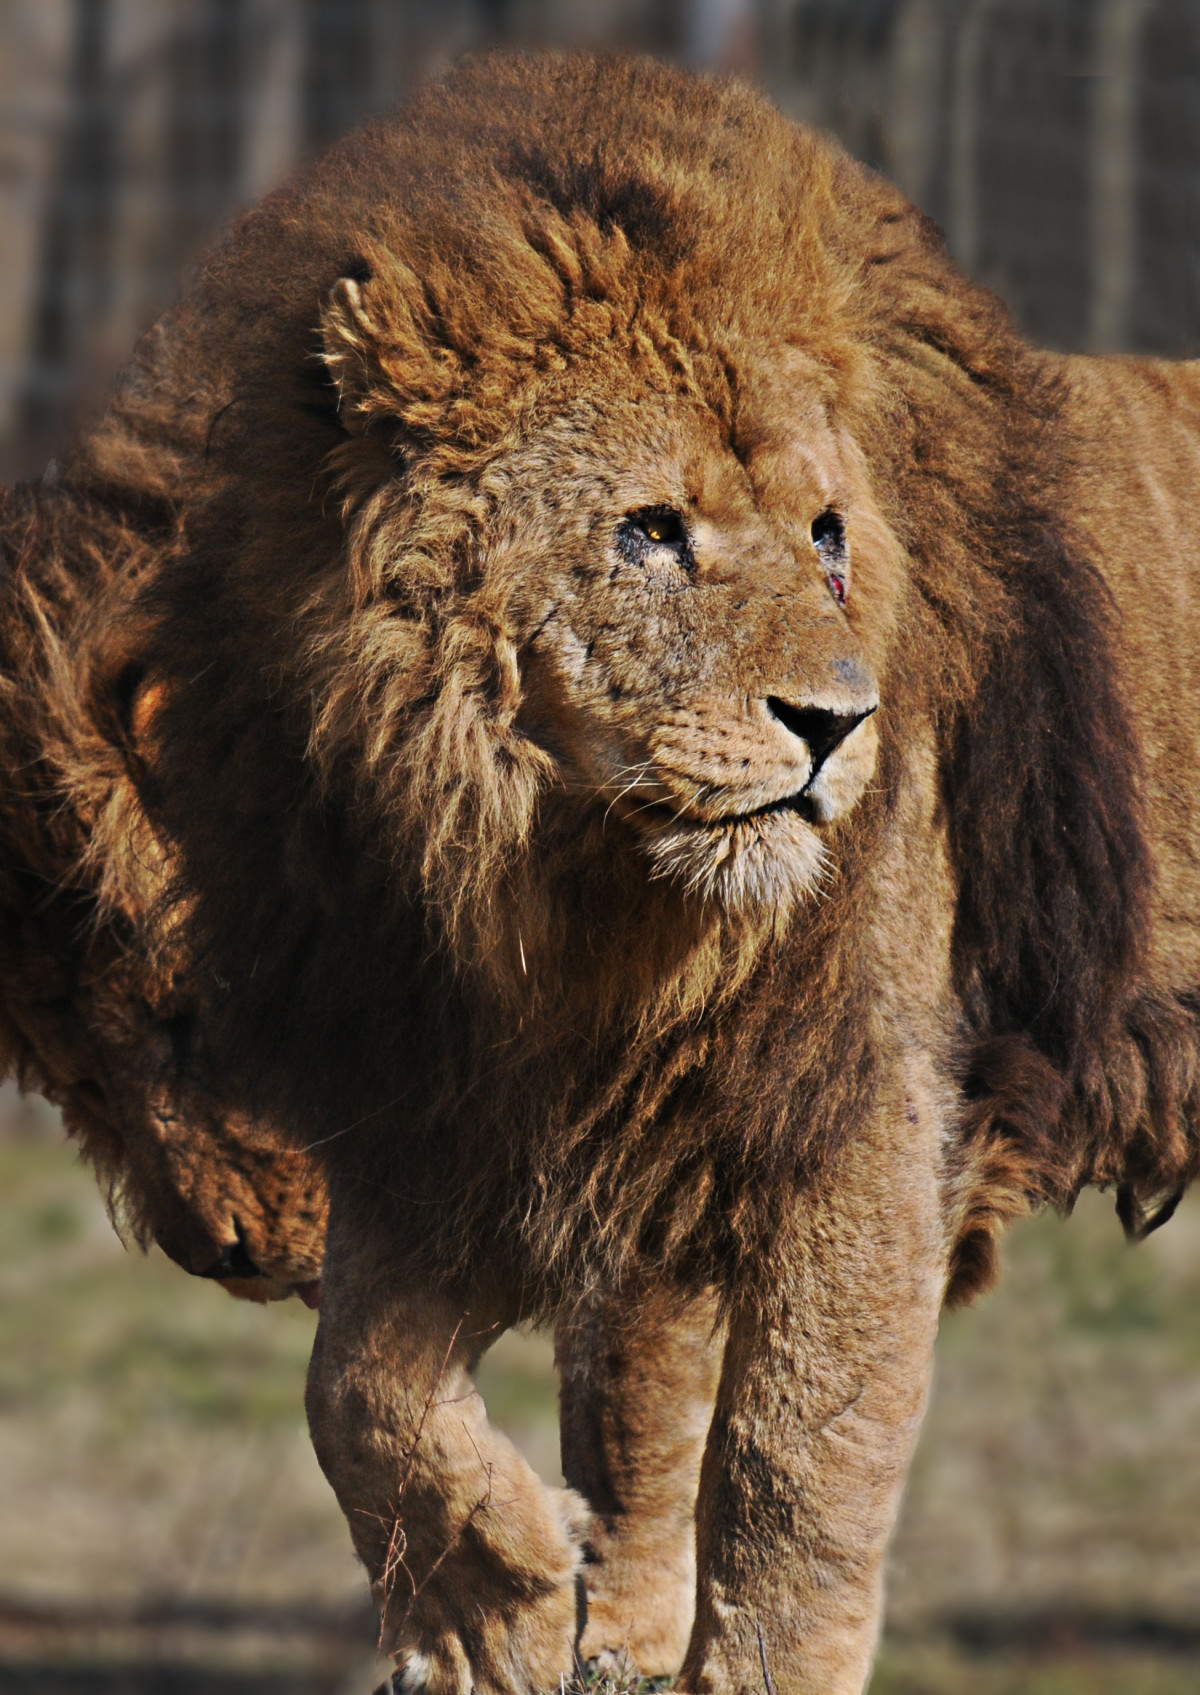

In [ ]:
from IPython.display import Image
Image("images/train/lion/lion.12.jpg")
#view sample imag for lion

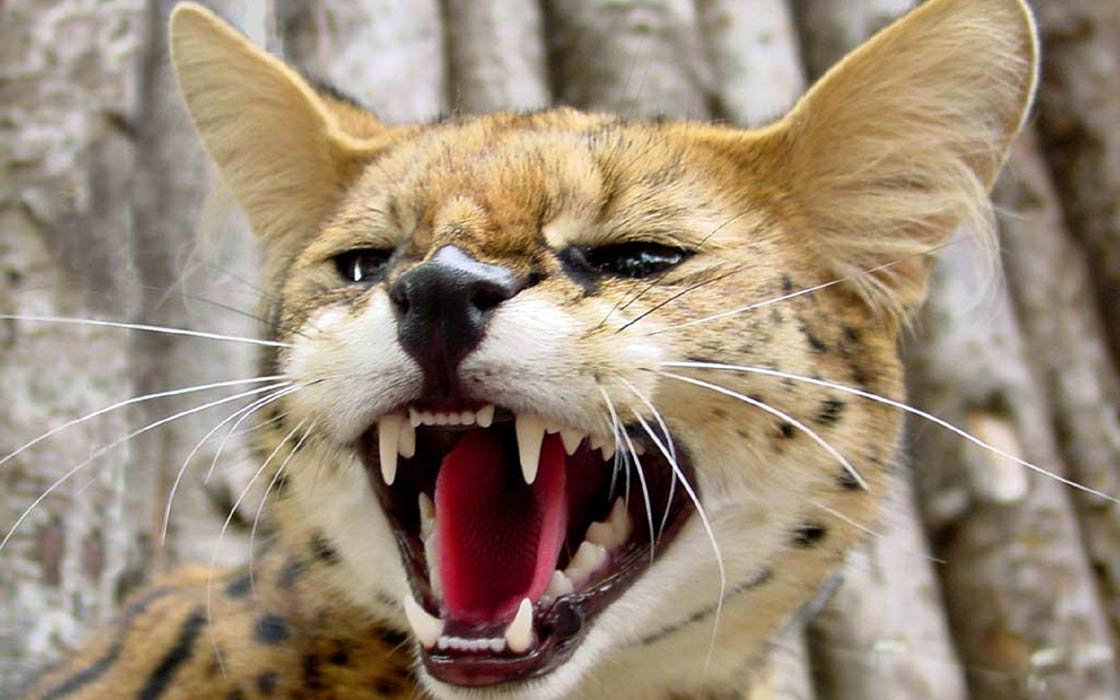

In [ ]:
Image("images/train/tiger/tiger.29.jpg")
# view sample image for tiger

# Fit Convolutional Neural Network Model

In [ ]:
train_dir = '/content/images/train' #training data path
validation_dir = '/content/images/validation' #validation data path
test_dir = '/content/images/test' #test data path

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( #to grab data chunks
    rescale=1./255, #we scale pixel values between 0 and 1 since we divide by 255
    rotation_range=40, #for data augmentation
    width_shift_range=0.2,#for data augmentation
    height_shift_range=0.2,#for data augmentation
    shear_range=0.2,#for data augmentation
    zoom_range=0.2,#for data augmentation
    horizontal_flip=True)#for data augmentation
#The idea is to flip, zoom, twist, shear and do other transformations on images to get more data and help kernel find better textures.

train_generator = train_datagen.flow_from_directory(
        train_dir, #directory with train images
        target_size=(150, 150), # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary') # Since binary classification problem. to ensure it grabs images from all categories.

val_datagen = ImageDataGenerator(rescale=1./255) #we do not aument validation data, we jsut scale it by dividing by 255 to get values between 0 and 1

validation_generator = val_datagen.flow_from_directory(
        validation_dir, #direcoty with validation images
        target_size=(150, 150), # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary') # Since binary classification problem. to ensure it grabs images from all categories.

test_datagen = ImageDataGenerator(rescale=1./255) #we do not aument test data, we jsut scale it by dividing by 255 to get values between 0 and 1

test_generator = test_datagen.flow_from_directory(
        test_dir, #directory with test images
        target_size=(150, 150), # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary') # Since binary classification problem. to ensure it grabs images from all categories.

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from keras import layers
from keras import models
#build model
model = models.Sequential()
model.add(layers.Conv2D(30, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) #3x3 size kernels with default stride of 1
                        #30 different kernels resulting in 30 different feature maps
                        #input is colored images of 3 channels with input size of 150x150
model.add(layers.MaxPooling2D((2, 2))) #aggressive downsampling
model.add(layers.Conv2D(60, (3, 3), activation='relu')) #light downsampling
model.add(layers.MaxPooling2D((2, 2))) #aggressive downsampling
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #light downsampling
model.add(layers.MaxPooling2D((2, 2))) #aggressive downsampling
model.add(layers.Conv2D(120, (3, 3), activation='relu')) #light downsampling
model.add(layers.MaxPooling2D((2, 2))) #aggressive downsampling
model.add(layers.Flatten()) #flatten to single row
model.add(layers.Dropout(0.5)) ##dropout of 0.5 means 50% connections turned off during model training
model.add(layers.Dense(480, activation='relu')) #relu - non linear activation function for hidden layers
model.add(layers.Dense(1, activation='sigmoid')) # output node #linear activation function for output node

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 60)        16260     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 60)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       69248     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers
# compile the model
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])
#loss=binary cross entropy since it is a binary classification problem

In [ ]:
# Early stopping callback defined for training
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', #we monitor accuracy on validation/test set
                                   mode='max', # we want to maximize accuracy
                                   patience=5,#If model doesn't improve within 5 epochs, stop and restore best weights when error was minimized.
                                   restore_best_weights=True)

In [ ]:
history = model.fit(
      train_generator, #train data
      steps_per_epoch=40, #total images/batch size = 400/10=40 #ensures every img is seen once during training
      callbacks=[es], #early stopping callback
      epochs=10,
      validation_data=validation_generator, #validaiton data
      validation_steps=20)  #images/batch size = 200/10=20


Epoch 1/10
40/40 [==============================] - 56s 1s/step - loss: 0.7013 - acc: 0.5350 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 2/10
40/40 [==============================] - 52s 1s/step - loss: 0.6921 - acc: 0.5000 - val_loss: 0.6880 - val_acc: 0.6450
Epoch 3/10
40/40 [==============================] - 51s 1s/step - loss: 0.7010 - acc: 0.5550 - val_loss: 0.6921 - val_acc: 0.5050
Epoch 4/10
40/40 [==============================] - 52s 1s/step - loss: 0.6919 - acc: 0.5400 - val_loss: 0.6844 - val_acc: 0.6800
Epoch 5/10
40/40 [==============================] - 51s 1s/step - loss: 0.6945 - acc: 0.5575 - val_loss: 0.6587 - val_acc: 0.5600
Epoch 6/10
40/40 [==============================] - 51s 1s/step - loss: 0.6762 - acc: 0.6025 - val_loss: 0.6484 - val_acc: 0.6250
Epoch 7/10
40/40 [==============================] - 52s 1s/step - loss: 0.6241 - acc: 0.6925 - val_loss: 0.7638 - val_acc: 0.5200
Epoch 8/10
40/40 [==============================] - 51s 1s/step - loss: 0.6328 - acc: 0.65

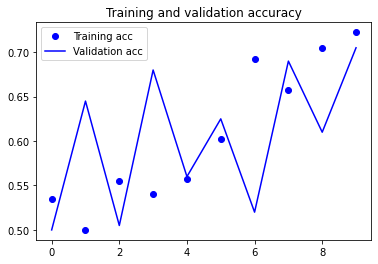

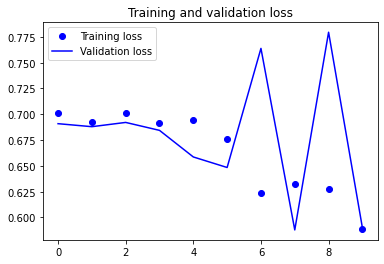

In [ ]:
import matplotlib.pyplot as plt
# learning curve
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
#plot acuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
#plot loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluate Model

## Validation set

In [ ]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [ ]:
import pandas as pd
#if we do model.predict(validaiton_generator)..the generator acts randomly so it grabs different data everytime its run
#hence we retain the value and label and store for every iteration
my_results = pd.DataFrame(columns={'actual','pred'})
batches = 0
for x_val, y_val in validation_generator:
  batches=batches+1
  y_pred = model.predict(x_val) #numpy array list of lists
  y_pred = flatten(y_pred) #flatten to single list
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})  #store actual value and predicted value in dataframe
  my_results = my_results.append(tmp)
  if batches >= 200 // 10:  # number of test images is 200. number of batches is 10.
  #200//10=20 batches. it runs 20 batches to evaluate every validation image. If bigger than that, break from loop.
    break #else it runs forever

1/1 [==============================] - 0s 144ms/step


In [ ]:
my_results #dataframe with predicted and actual values

,pred,actual
0,0.540700,1.0
1,0.382512,0.0
2,0.846386,1.0
3,0.761651,1.0
4,0.878163,1.0
...,...,...
5,0.920090,1.0
6,0.945581,1.0
7,0.284920,0.0
8,0.678827,0.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0))) #rounded to comapre with actuals

#MODEL HAS 78% ACCURACY ON VALIDATION SET

              precision    recall  f1-score   support

         0.0       0.88      0.61      0.72        96
         1.0       0.72      0.92      0.81       104

    accuracy                           0.78       200
   macro avg       0.80      0.77      0.77       200
weighted avg       0.80      0.78      0.77       200



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

#Clearly the model is getting many predictions right with high True positive and True negative values.

[[59 37]
 [ 8 96]]


## Test set

In [ ]:
import pandas as pd
#if we do model.predict(test_generator)..the generator acts randomly so it grabs different data everytime its run
#hence we retain the value and label and store for every iteration
my_results2 = pd.DataFrame(columns={'actual','pred'})
batches = 0
for x_val, y_val in test_generator:
  batches=batches+1
  y_pred = model.predict(x_val) #numpy array list of lists
  y_pred = flatten(y_pred) #flatten to single list
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})  #store actual value and predicted value in dataframe
  my_results2 = my_results2.append(tmp)
  if batches >= 200 // 10:  # number of test images is 200. number of batches is 10.
  #200//10=10 batches. it runs 10 batches to evaluate every validation image. If bigger than that, break from loop.
    break #else it runs forever

1/1 [==============================] - 0s 162ms/step


In [ ]:
my_results2 #dataframe with predicted and actual values

,pred,actual
0,0.884998,0.0
1,0.409853,0.0
2,0.809578,0.0
3,0.411022,1.0
4,0.232985,0.0
...,...,...
5,0.463142,0.0
6,0.749623,1.0
7,0.682774,0.0
8,0.333269,0.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results2['actual'],
                            y_pred=np.round(my_results2['pred'],0))) #rounded to comapre with actuals
# MODEL HAS 73% ACCURACY ON TEST SET

              precision    recall  f1-score   support

         0.0       0.85      0.54      0.66        98
         1.0       0.67      0.91      0.78       102

    accuracy                           0.73       200
   macro avg       0.76      0.73      0.72       200
weighted avg       0.76      0.73      0.72       200



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=my_results2['actual'],
                            y_pred=np.round(my_results2['pred'],0)))
#Clearly the model is getting many predictions right with high True positive and True negative values.

[[53 45]
 [ 9 93]]


# Model learnings

*   It was interesting fetching image data and segregating them into train and validation partitions. i believe it was the most challenging part.
*   I learnt shell script operations for adding,renaming and deleting directories and files using python itself and I find it super helpful
*   The model gave better results upon usin data augmentation which makes sense because deep learning models perfom better with more data. It helped reduce overfitting as well.
*   The model runs better upon incorporating dropout.
*   Increasing the number of convolutional and pooling layers gave me better results as well.


# Transfer Learning (VGG16)

A pre-trained network is simply a saved network previously trained on a large dataset, typically on a large-scale image classification task. If this original dataset is large enough and general enough, then the spatial feature hierarchy learned by the pre-trained network can effectively act as a generic model of our visual world, and hence its features can prove useful for many different computer vision problems, even though these new problems might involve completely different classes from those of the original task. For instance, one might train a network on ImageNet (where classes are mostly animals and everyday objects) and then re-purpose this trained network for something as remote as identifying furniture items in images. Such portability of learned features across different problems is a key advantage of deep learning compared to many older shallow learning approaches, and it makes deep learning very effective for small-data problems.

We will use the VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014, a simple and widely used convnet architecture for ImageNet. 

## Feature extraction

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

As we saw previously, convnets used for image classification comprise two parts: they start with a series of pooling and convolution layers, and they end with a densely-connected classifier. The first part is called the "convolutional base" of the model. In the case of convnets, "feature extraction" will simply consist of taking the convolutional base of a previously-trained network, running the new data through it, and training a new classifier on top of the output.

In [1]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet', # weights from imagenet - very important! otherwise it's just the network structure
                  include_top=False, # this means that our dense layer will be trained specific to our small data problem that we are solving
                  input_shape=(150, 150, 3)) # this is the shape of the data from our data generator (we know cats vs. dogs is 150 x 150)

58889256/58889256 [==============================] - 0s 0us/step


We passed three arguments to the constructor:

* `weights`, to specify which weight checkpoint to initialize the model from
* `include_top`, which refers to including or not the densely-connected classifier on top of the network. By default, this 
densely-connected classifier would correspond to the 1000 classes from ImageNet. Since we intend to use our own densely-connected 
classifier (with only two classes, cat and dog), we don't need to include it.
* `input_shape`, the shape of the image tensors that we will feed to the network. This argument is purely optional: if we don't pass it, 
then the network will be able to process inputs of any size.

Here's the detail of the architecture of the VGG16 convolutional base: it's very similar to the simple convnets that you are already 
familiar with.

In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))